# Visibility

This notebook gives an example on how to calculate the visibility of KM3NeT/ARCA. This example is based on the function `visibility_below_coszen` in `src/arca230/coordinates.py`. The detector longitude of 0.278819 and latitude of 0.633407 in radians is used to convert the declination and right ascension of a source to the zenith for a full day.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from arca230.coordinates import visibility_below_coszen

The track selection has a cut at $\theta > 80^\circ$ in the coordinate system where $\theta = 0^\circ$ is downgoing. The shower selection cover the full-sky.

In [2]:
zen_cut = 80  # [degrees]
cos_zen_cut = np.cos(80 * np.pi / 180)

sindecs = np.linspace(-1, 1.0, 20)
visibility = np.zeros(len(sindecs))

Now for every position in the sky, we can calcute the fraction of time where this source is in our field of view

In [3]:
for i in range(len(sindecs)):
    visibility[i] = visibility_below_coszen(cos_zen_cut, sindecs[i], 200)

Let's plot!

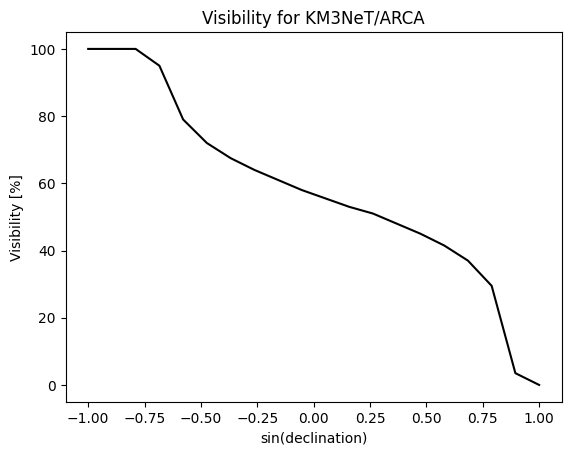

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(sindecs, visibility * 100, color="black")
ax.set_title("Visibility for KM3NeT/ARCA")
ax.set_xlabel(r"sin(declination)")
ax.set_ylabel("Visibility [%]")

plt.show()